In [5]:
import os
from glob import glob
from tqdm import tqdm
import cv2


[이미지의 기하하적 변경](https://opencv-python.readthedocs.io/en/latest/doc/10.imageTransformation/imageTransformation.html)

interpolation(보간법): 이미지 크기가 변할때 pixel 사이의 값을 결정할 때 사용
### cv2
- 줄일 때: `cv2.INTER_AREA`,
- 키울 때: `cv2.INTER_CUBIC` > `cv2.INTER_LINEAR`(default, 비교적 모든 크기 조정 목적에 부합)
![CV2_Flags](images/CV2_Flags.jpg)

### pillow
- default: BILINEAR
![Pillow_Filter](images/Pillow_Filter.jpg)

In [41]:
root_dir = '/opt/ml/input/data/train_dataset/'
load_dir = root_dir + 'images/' # 원래 이미지 폴더
save_dir = root_dir + '128_128/' # 새로 저장할 폴더
to_width, to_height = (128, 128) # resize할 width & height
if not os.path.exists(save_dir):
        os.makedirs(save_dir)
for file_path in tqdm(glob(load_dir+'*')):
    try:
        # 1. 이미지 로드 => BGR
        image = cv2.imread(file_path)
        # 2. 리사이즈
        image = cv2.resize(image, dsize=(to_width, to_height), interpolation=cv2.INTER_AREA)
        # 3. 이미지 저장
        file_name = file_path.split('/')[-1] # e.g. train_00000.jpg
        cv2.imwrite(save_dir+file_name, image)
    except OSError as e:
        print(f'error at {f}: {e}')

100%|██████████| 100000/100000 [21:02<00:00, 119.90it/s]


In [6]:
import matplotlib.pyplot as plt


  0%|          | 0/100000 [00:00<?, ?it/s]

/opt/ml/input/data/train_dataset/rotated/images/train_59454.jpg


 1


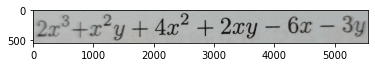


  0%|          | 1/100000 [00:02<66:02:41,  2.38s/it]

/opt/ml/input/data/train_dataset/rotated/images/train_86276.jpg


 2


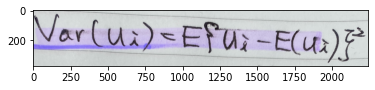


  0%|          | 2/100000 [00:03<58:41:12,  2.11s/it]

/opt/ml/input/data/train_dataset/rotated/images/train_06519.jpg


KeyboardInterrupt: Interrupted by user

In [7]:
root_dir = '/opt/ml/input/data/train_dataset/'
load_dir = root_dir + 'rotated/images/' # 원래 이미지 폴더
save_dir = root_dir + 'sssample/' # 새로 저장할 폴더
to_width, to_height = (256, 64) # resize할 width & height
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
for file_path in tqdm(glob(load_dir+'*')):
    print(file_path)
    aaa = input()
    image = cv2.imread(file_path)
    plt.imshow(image)
    plt.show()

In [10]:
# 1. cv2.imread로 이미지 읽어오기
# sample = cv2.imread('/opt/ml/input/data/train_dataset/images/' + 'train_19617.jpg')
sample = cv2.imread('/opt/ml/input/data/train_dataset/rotated/' + 'train_06519.jpg')
print(sample)
# plt.imshow(sample)
# plt.show()

None


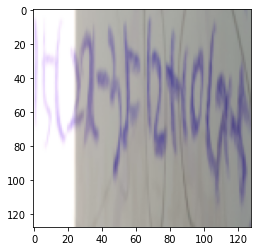

In [8]:
# 2. cv2.resize로 이미지 크기 조절하기
resized_sample = cv2.resize(sample, dsize=(128, 128), interpolation=cv2.INTER_AREA)
plt.imshow(resized_sample)
plt.show()

In [9]:
cv2.imwrite('/opt/ml/input/data/train_dataset/'+'resized_sample.jpg', resized_sample)

True

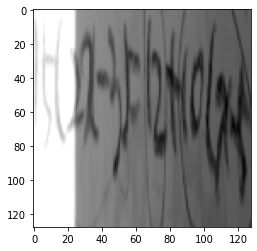

In [10]:
# 3. cv2.cvtColor로 gray 스케일로 변환 => 어차피.... RGB로 저장되네 (Pixel별 RGB는 동일값)
gray_sample = cv2.cvtColor(resized_sample, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_sample, cmap='gray')
plt.show()

In [11]:
gray_sample.shape

(128, 128)

In [32]:
# 4. cv2.imwrite로 저장하기
cv2.imwrite('/opt/ml/input/data/train_dataset/'+'gray_sample.jpg', gray_sample)

True

In [30]:
cv2.imwrite('/opt/ml/input/data/train_dataset/'+'gray_sample.jpg', resized_sample)

True

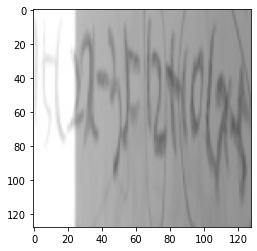

In [34]:
# 5.1 cv2.imread로 gray이미지 읽어오기 => 어차피 (128, 128, 3)
gray_sample = cv2.imread('/opt/ml/input/data/train_dataset/gray_sample.jpg')
plt.imshow(sample)
plt.show()

In [37]:
gray_sample.shape

(128, 128, 3)

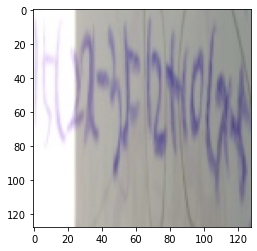

In [12]:
# 5.1 cv2.imread로 gray이미지 읽어오기 => 어차피 (128, 128, 3)
resized_sample = cv2.imread('/opt/ml/input/data/train_dataset/resized_sample.jpg')
plt.imshow(resized_sample)
plt.show()

In [40]:
resized_sample.shape

(128, 128, 3)

In [41]:
# import time
# start = time.time()
# for _ in range(1000):
#     cv2.resize(sample, dsize=(128, 128), interpolation=cv2.INTER_AREA)
# end = time.time()
# print(end - start)

10.481535196304321
